In [42]:
import numpy as np
from itertools import zip_longest
import matplotlib.pyplot as plt
import csv, argparse
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
%matplotlib inline

In [43]:
print(os.getcwd())

/home/vatsal/SDN/BitBucketRepos/CarND-Behavioral-Cloning-Project


In [44]:
base_dir = os.getcwd()
log_path = os.path.join(base_dir, 'driving_log.csv')
img_dir = os.path.join(base_dir, 'IMG/')
print(img_dir)

/home/vatsal/SDN/BitBucketRepos/CarND-Behavioral-Cloning-Project/IMG/


In [58]:
logs = []
with open(log_path,'rt') as f:
    reader = csv.reader(f)
    for line in reader:
        logs.append(line)
log_labels = logs.pop(0)
print(len(logs))

14906


In [152]:
img = plt.imread((logs[970][0]).strip())
plt.imshow(img)
plt.show()
shape = img.shape
img_trimed = img[np.floor(shape[0]/3 - 5):shape[0]-25]
print(img.shape)
plt.imshow(img_trimed)
plt.show()
print(img_trimed.shape)
img_resized = cv2.resize(img_trimed,(64,64))
plt.imshow(img_resized)
plt.show()
print(img_resized.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/IMG/center_2017_01_14_14_33_27_764.jpg'

In [149]:
def gamma_correction(img, correction):
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255.)

1.1082644472130412


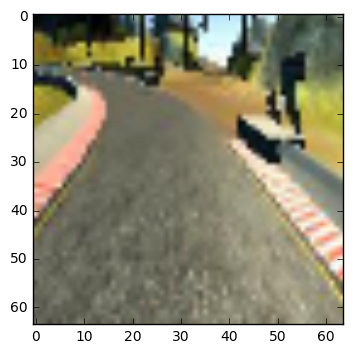

In [151]:
bright_factor = 0.2 + (3.8 * np.random.uniform())
print(bright_factor)
g_c_img = gamma_correction(img_resized, bright_factor)
plt.imshow(g_c_img)

In [141]:
def generate_image(img, y):
    
    angle = y

    X_OFFSET_RANGE = 10
    Y_OFFSET_RANGE = 10
    X_OFFSET_ANGLE = 0.2
    
    if (np.random.uniform() > 1.0):
        img = np.fliplr(img)
        angle = -1.0 * angle

    x_translation = (X_OFFSET_RANGE * np.random.uniform()) - (X_OFFSET_RANGE / 2)
    y_translation = (Y_OFFSET_RANGE * np.random.uniform()) - (Y_OFFSET_RANGE / 2)

    angle = angle + ((x_translation / X_OFFSET_RANGE) * 2) * X_OFFSET_ANGLE
    t = np.float32([[1, 0, x_translation], [0, 1, y_translation]])
    img = cv2.warpAffine(img, t, (img.shape[1], img.shape[0]))

    return (img, angle)

In [142]:
print(logs[870][3])

0


0.03455197788112161


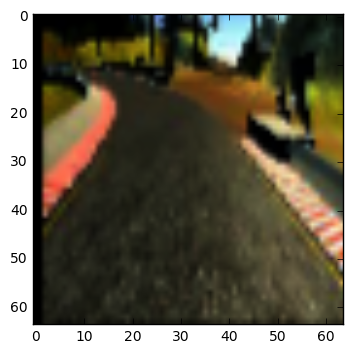

In [143]:
gen_img, new_y = generate_image(g_c_img, float(logs[850][3]))
plt.imshow(gen_img)
print(new_y)

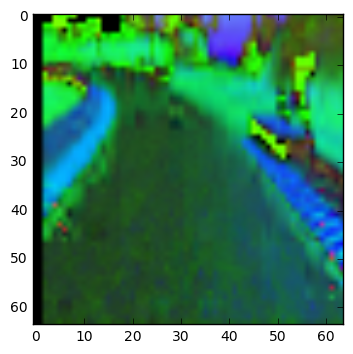

In [144]:
image1 = cv2.cvtColor(gen_img,cv2.COLOR_RGB2HSV)
plt.imshow(image1)